In [2]:
! pip install spotipy

  Using cached https://files.pythonhosted.org/packages/7a/cd/e7d9a35216ea5bfb9234785f3d8fa7c96d0e33999c2cb72394128f6b4cce/spotipy-2.16.1-py3-none-any.whl
    100% |████████████████████████████████| 61kB 1.2MB/s ta 0:00:01
  Found existing installation: requests 2.19.1
    Uninstalling requests-2.19.1:
      Successfully uninstalled requests-2.19.1
You are using pip version 19.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [139]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="90a6aa310e894f489bee434eb377e40f",
                                                           client_secret="0d2bd2f3823b4edd82e8b8a79f17e2f5"))

results = sp.search(q='abaca', limit=10, type='artist')
#items = results['artists']['items']
for idx, artist in enumerate(results['artists']['items']):
    #print(idx, track['name'])
    print(artist['id'],artist['name'])

37YBTVhchsMr6ekdUHEKRy Abacaxepa
3AHoaqxjzhovQCUMi9Meyt Abacabb
666M89buNDdSNpMkCFzkLm Abacaxi
3ZW7rxr2KodwFKb06qGKSb Abacab
0rKdjngABczCJGv9AxwoyT Abacaxi
7hTGdQWv78QXZJLGeiVZQh Mc Abaca
40e3KIbAsryGGVgybZYcQ2 Abacay
3v05X7AbTJ01yFKpDwYFWP Flor De Abacate
4MAPbJTPmFSvqvVB6kKPa6 Abacalypse
7zfAiZED7MO8MSj8jSFSiv Abacate Contemporâneo


In [126]:
results = sp.search(q='mic', limit=10, type='album')
#items = results['artists']['items']
for idx, artist in enumerate(results['albums']['items']):
    #print(idx, track['name'])
    print(artist['id'],artist['name'])
print(artist.keys())

7uVimUILdzSZG4KKKWToq0 Christmas (Deluxe Special Edition)
4TEkdmWgOV6ys0LJjcpAiV Michelle
7BrlhEO8dHiNmU8A1Ep9RZ If the World Was Ending (feat. Julia Michaels)
1yY9R0IjLXGhf3aPb6Y63k Micropop
3CKVXhODttZebJAzjUs2un Christmas
3rpSksJSFdNFqk5vne8at2 Michael Bublé
1C2h7mLntPSeVYciMRTF4a Thriller 25 Super Deluxe Edition
3coLNlyStg9h7f8CZ103Rl Ladies And Gentlemen... The Best Of George Michael
2xqbyzv6NncmREgqNFP5Ee Mickey Mouse Clubhouse
7zGPSFi3LOIC1L5Dj0oEBx From Michigan With Love
dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])


In [169]:
results = sp.recommendation_genre_seeds()

In [171]:
len(results['genres'])

126

In [172]:
results['genres']

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'bossanova',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'holidays',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie',
 'indie-pop',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metal-misc',
 'metalcore',
 'minimal-techno',
 'movies',
 'mpb',
 'new-age',
 'new-release',
 'opera',
 'pagode',

In [ ]:
# approach1: genres => artists => albums => songs
# approach2: artists,songs => albums => genre(infered)  

In [ ]:
def getGenres

# Exploration1: genre based matching

## Approach1: Simple Jaccard

### Discovery 1: Only artists return genre => have to redirect to artists if using track or album

In [146]:
# dependency injection, display as user is typing
def searchArtist(name,spapi,limit=10):
    results = spapi.search(q=name, limit=limit, type='artist')
    return [(elem['name'],elem['id'],elem['genres']) for elem in results['artists']['items']]
# dependency injection, display as user is typing
def searchMusic(name,spapi,limit=10):
    results = spapi.search(q=name, limit=limit, type='track')
    return [(elem['name'],elem['id'], elem['type']) for elem in results['tracks']['items']]

In [148]:
searchArtist("the weeknd",sp)

[('The Weeknd',
  '1Xyo4u8uXC1ZmMpatF05PJ',
  ['canadian contemporary r&b', 'canadian pop', 'pop']),
 ('The Weeknd´s', '4hX2FJqqKfTHzSL5kQYa0O', [])]

In [164]:
def jaccard(arr1,arr2):
    return len(set(arr1)-set(arr2))/len(set(arr1+arr2))

In [165]:
test_artists_zong = ["the weeknd","greenday","chopin"]
test_artists_amit = ["lady gaga","dua lipa","queens"]
zong_genres = [searchArtist(artist,sp)[0][2] for artist in test_artists_zong]
amit_genres = [searchArtist(artist,sp)[0][2] for artist in test_artists_amit]

In [166]:
zong_bulk = []
for genres in zong_genres: zong_bulk += genres
amit_bulk = []
for genres in amit_genres: amit_bulk += genres
jaccard(zong_bulk,amit_bulk)

0.38095238095238093

## Approach2: Collaborative Filtering

### Discovery 2: New idea: choose artists => rank related categories => collaborative filtering
### Feature space: 126 genres but filtered by users' chosen artists => sparse matrix

### CF Family Member 1: Cosine Similarity

In [176]:
availabe_genres = sp.recommendation_genre_seeds()['genres']
encodings = {value:index for index,value in enumerate(availabe_genres)}

In [187]:
import random
def userInputConversion(k=5):
    feature_arr = [0]*len(availabe_genres)
    inferred_genres = random.sample(availabe_genres,k)
    # simulate inclusion => inferred from artists
    for genre in inferred_genres:
        ranking = input("From 1-5: how do you rank: "+genre+" ")
        feature_arr[encodings[genre]] = int(ranking)
    # simulate exclusion => inferred from ~artists
    for genre in random.sample(list(set(availabe_genres)-set(inferred_genres)),k):
        ranking = input("From 1-5: how do you rank: "+genre+" ")
        feature_arr[encodings[genre]] = int(ranking)
    return feature_arr

In [ ]:
userInputConversion()

In [208]:
from scipy import spatial
def cosineSim(arr1,arr2):
    return 1-spatial.distance.cosine(arr1,arr2)

In [209]:
cris_genre = [random.randint(0,6) for _ in range(len(availabe_genres))]
cris_rated_genres = [genre for genre in encodings if cris_genre[encodings[genre]] > 0]
cris_rated_genres[:5]

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient']

In [242]:
# fake other users
other_fake_people = [[random.randint(0,6) for _ in range(len(availabe_genres))] for k in range(25)]
# sort by similarity 
other_fake_people.sort(key=lambda x:cosineSim(cris_genre,x),reverse=True)

In [243]:
other_fake_people[0][:5], cris_genre[:5]

([2, 6, 6, 0, 2], [2, 2, 4, 2, 3])

In [244]:
cosineSim(other_fake_people[0],cris_genre)

0.7289985012459018

In [246]:
fake_best_result = [elem if random.randint(0,6) > 0 else elem-1 for elem in cris_genre ]
cosineSim(fake_best_result,cris_genre)

0.9937909143359784

In [247]:
cosineSim(cris_genre,cris_genre)

1.0

### CF Family Member 2: KNN

In [251]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
def getSimilarUser(existing_users, current_user,k=2,algo='ball_tree',m='minkowski'):
    _,matched_users = NearestNeighbors(n_neighbors=k, algorithm=algo,metric=m).fit(existing_users).kneighbors(current_user)
    return matched_users

#### KNN with Cosine Similarity => same as above

In [256]:
neightbors_indices = getSimilarUser(other_fake_people,[cris_genre],algo='brute',m='cosine')[0]

In [257]:
cosineSim(other_fake_people[neightbors_indices[0]],cris_genre)

0.7289985012459018

#### KNN with Ball Tree

In [258]:
neightbors_indices2 = getSimilarUser(other_fake_people,[cris_genre])[0]

In [259]:
cosineSim(other_fake_people[neightbors_indices2[0]],cris_genre)

0.6999050914223359

## Approach3: Graph Theory? => Optimization and Connection Recommendation(later)

### Priority Queue: each edge is a rating of a certain category, e.g. user1 gives 3 to genre2
### Two usages: reduce search space & get degrees of matching, e.g. u2 is first degree to u3, u1 is second degree to u3. 
### Algorithm idea: second degree means there is no direct edge in-between. strength of each degree is measured by sum of the edge values.
###  Reduce search space: now we can only calculate similarity between first and second connections => less computing time (before we are calculating similarity for all users )

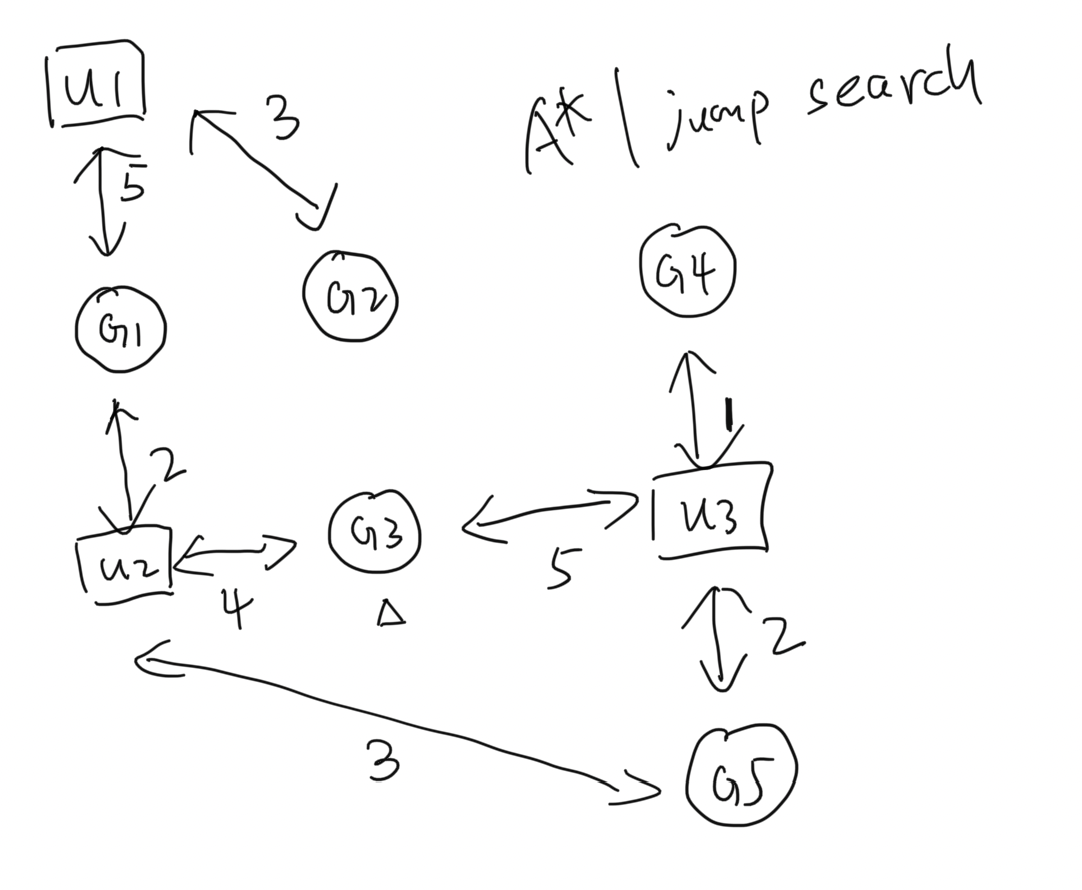